<a href="https://colab.research.google.com/github/ziyadshezoo/-Advertising-Sales-Linear-Regression-/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics 

In [2]:
df=pd.read_csv('/kaggle/input/advertising-sales-dataset/Advertising Budget and Sales.csv')
df.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.columns = ['TV', 'Radio', 'Newspaper', 'Sales']
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
reg=LinearRegression()
B=df['Sales']
A=df[['TV','Radio','Newspaper']]


In [6]:
trainx,testx,trainy,testy=train_test_split(A,B,test_size=0.3,random_state=0)
print(f"train x:{trainx.shape}\ntest x:{testx.shape}\ntrain y:{trainy.shape}\ntest x:{testx.shape}")

train x:(140, 3)
test x:(60, 3)
train y:(140,)
test x:(60, 3)


In [7]:
reg.fit(trainx,trainy)
p=reg.predict(testx)
dff=pd.DataFrame({'Real':testy,"Predict":p})
dff.head()

,Real,Predict
18,11.3,10.058667
170,8.4,7.433188
107,8.7,6.953057
98,25.4,24.168746
177,11.7,11.981720


In [8]:
reg.coef_
#slope

array([0.04391531, 0.20027962, 0.00184368])

In [9]:
reg.intercept_


2.8802552863313213

<b>Predict</b>

to check<b> the accuracy</br>

In [10]:
print(f'Accuracy : {reg.score(testx,testy)*100} %')

Accuracy : 86.49018906637791 %


In [11]:
print('Mean Absolute Error:', metrics.mean_absolute_error(testy, p))

Mean Absolute Error: 1.233375952285021


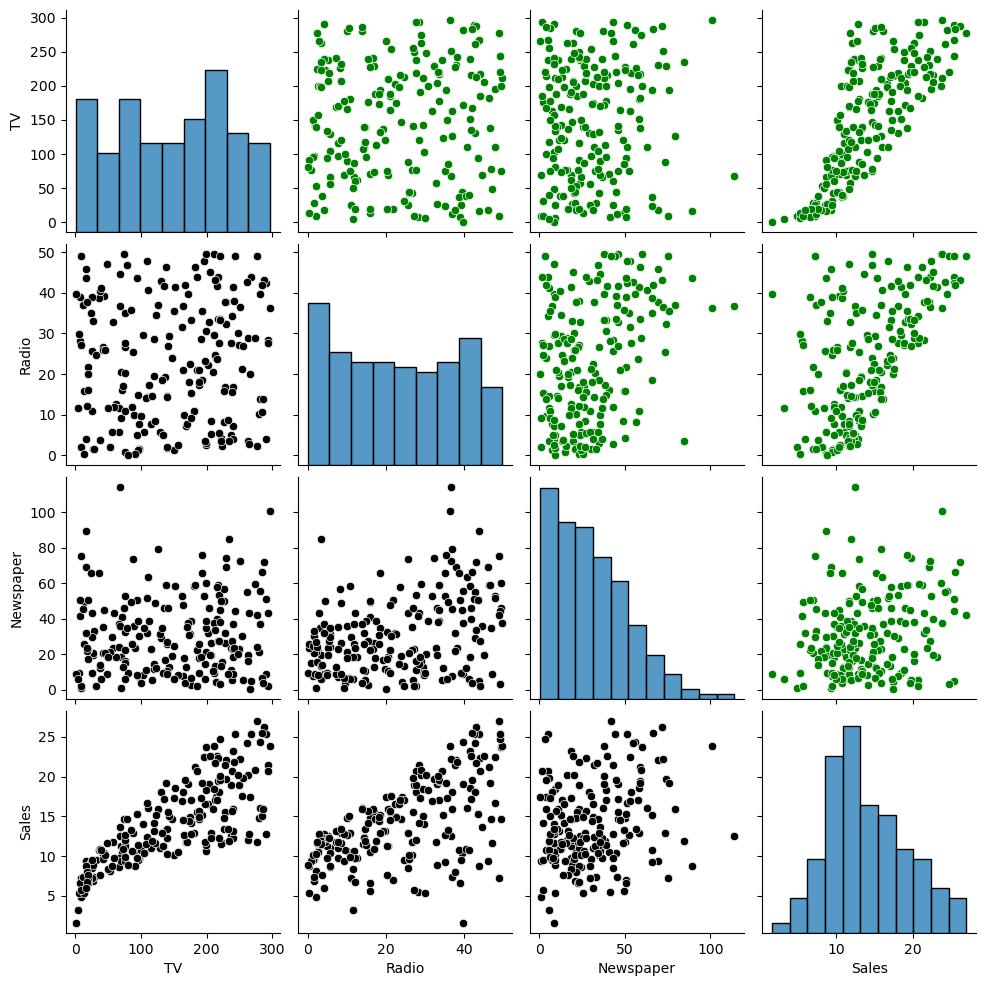

In [12]:
sn=sns.pairplot(df)
sn.map_upper(sns.scatterplot,color="green")
sn.map_lower(sns.scatterplot,color="black")


Text(0.5, 1.0, 'The Regression Line Of ad Newspaper Vs Sales')

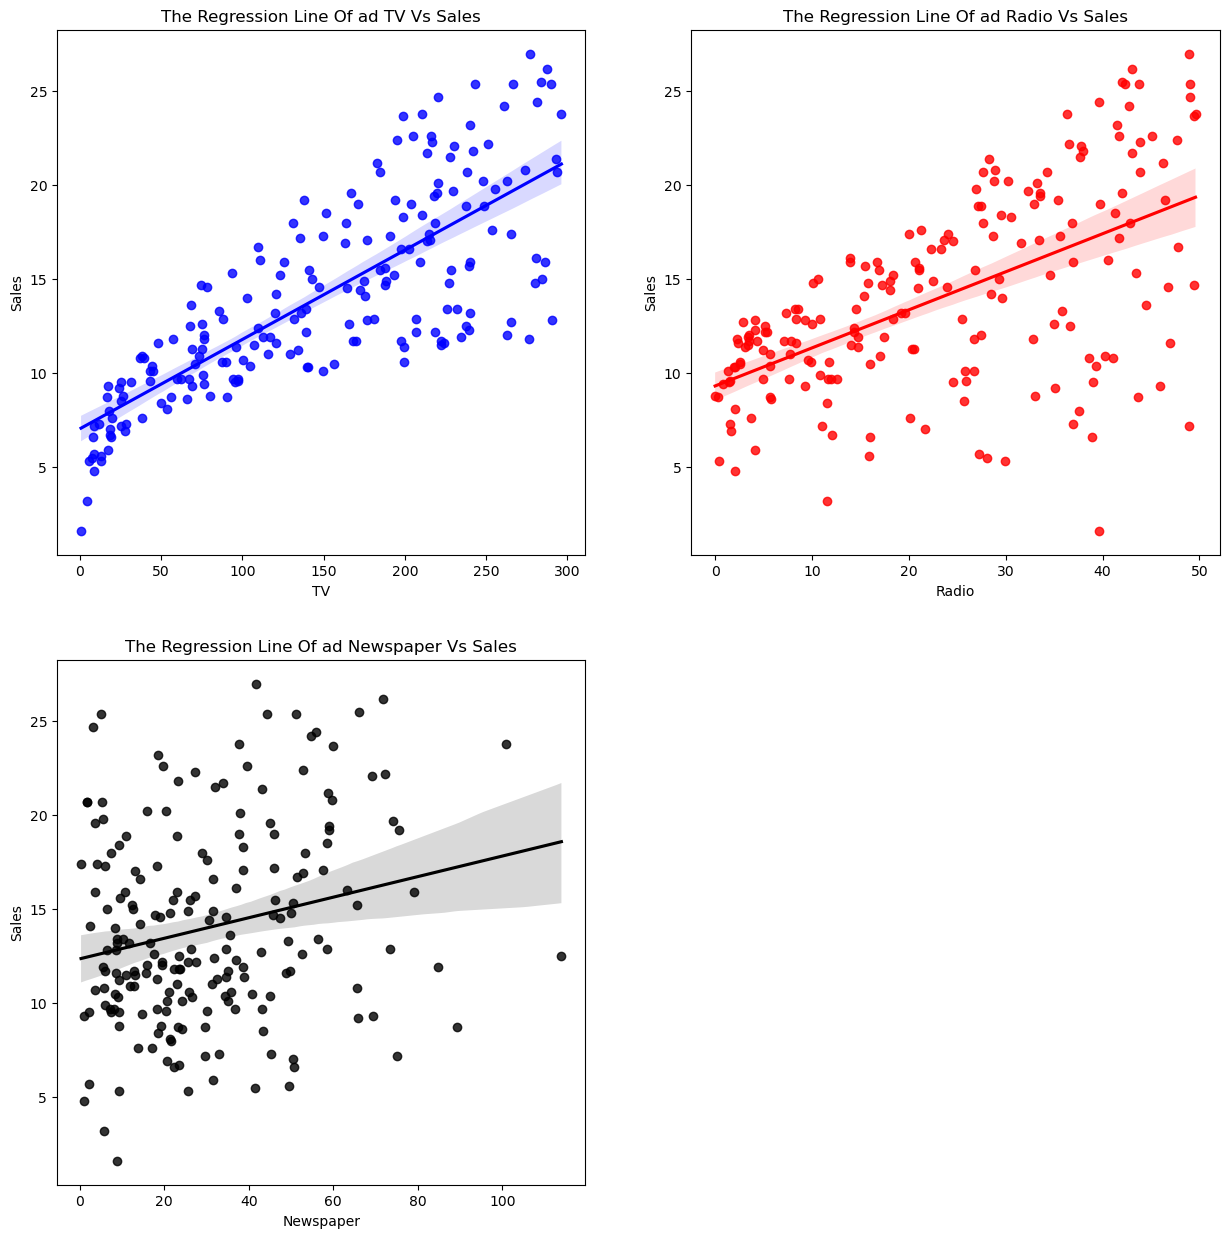

In [13]:
plt.figure(figsize =(15,15))
plt.subplot(2,2,1)
sns.regplot(data=df,x='TV',y='Sales',color='b').set_title('The Regression Line Of ad TV Vs Sales')
plt.subplot(2,2,2)
sns.regplot(data=df,x='Radio',y='Sales',color='r').set_title('The Regression Line Of ad Radio Vs Sales')
plt.subplot(2,2,3)
sns.regplot(data=df,x='Newspaper',y='Sales',color='k').set_title('The Regression Line Of ad Newspaper Vs Sales')